### PAUTA Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

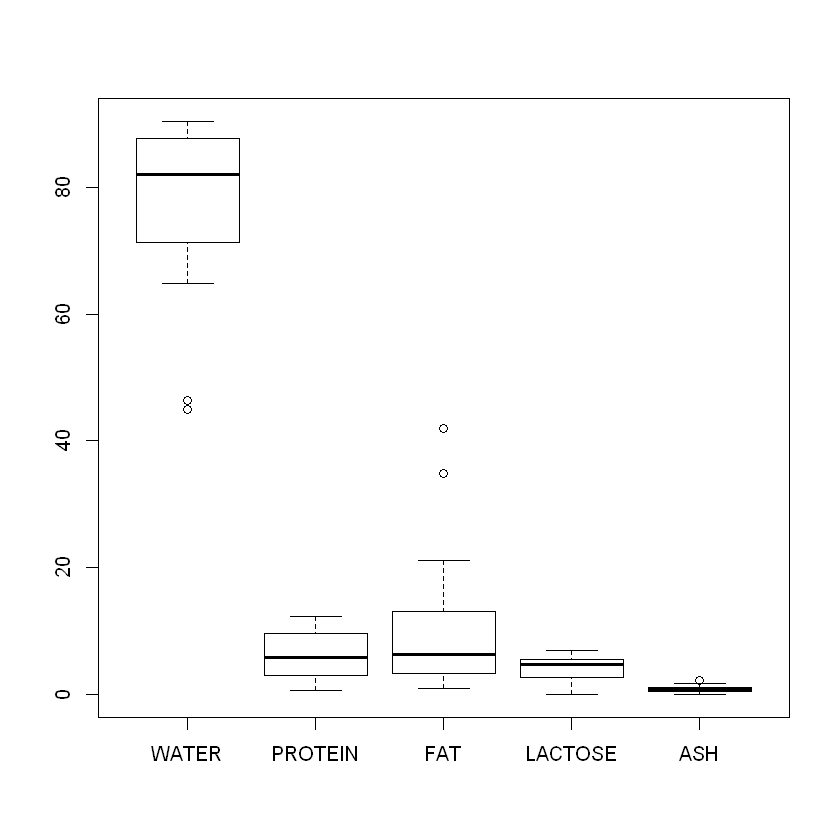

In [3]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("c:\\milk.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)

**Descripción de los datos y porque realizar un análisis de agrupamiento**

Se trata de un conjunto de datos que describen la composición de la leche de 25 mamíferos. Se consideran 5 características en porcentajes: agua, proteína, grasa, lactosa y calcio. Se puede observar del boxplot que, en promedio, el mayor porcentaje de todas las leches es agua (cerca de 80%), seguido de proteína, grasa y lactosa (cerca del 5%) y bastante menor porcentaje de calcio (0,8%). Las componente que tienen mayor variación son el porcentaje de agua y de grasa. Parece pertinente realizar un análisis de agrupamiento para distinguir grupos de mamíferos que poseen leches de características similares.

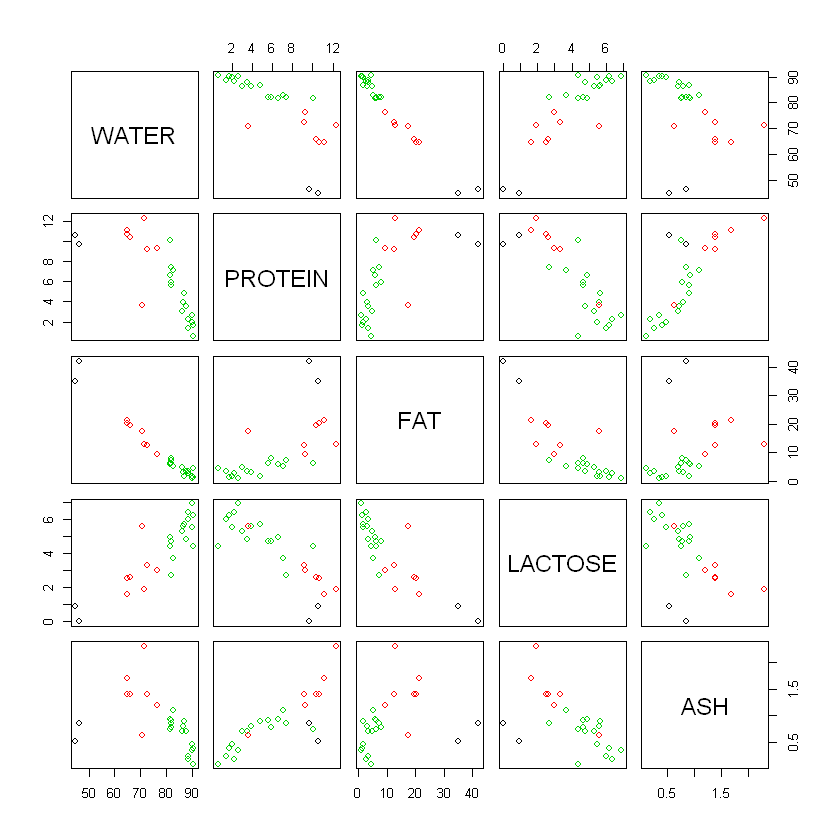

In [4]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 3 grupos con el algoritmo KMeans, se obtienen grupos claramente diferenciados por las variables porcentaje de agua y grasa. El grupo negro (focas y delfines), con los menores porcentajes de agua y mayores porcentajes de grasa. El grupo negro, con 6 mamíferos, cuyas leches tienen porcentajes intermedios de agua (60 a 75%) y grasa (12 a 22%). Y luego el grupo rojo, el mas común, con 17 mamíferos, cuyas leches tienen mas de 75% de agua y menos de 10% de grasa. Las otras variables no permiten discriminar completamente los 3 grupos definidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

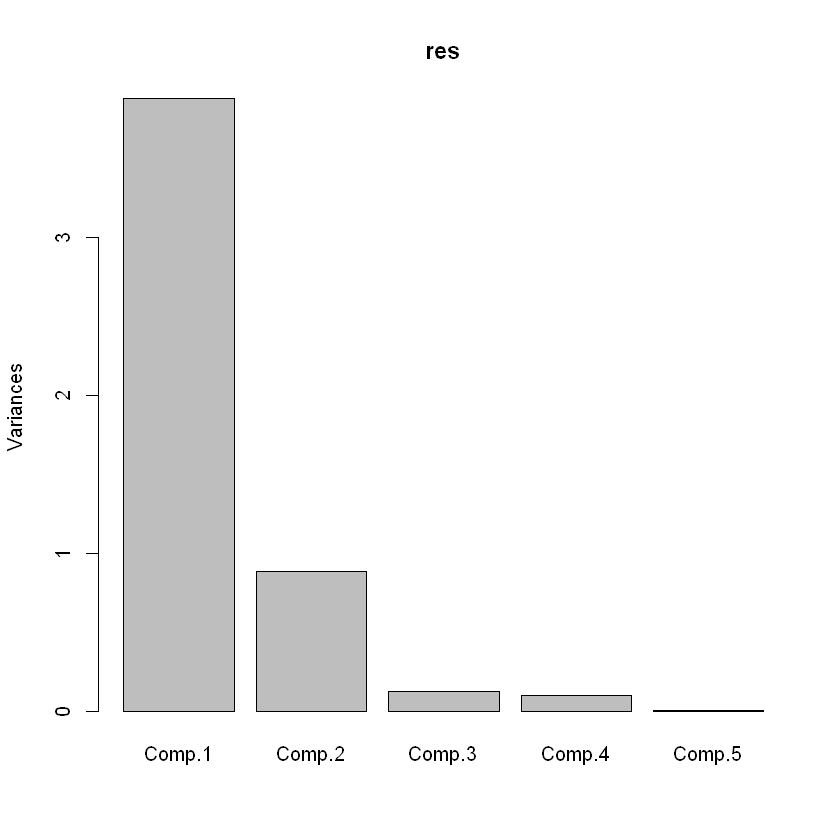

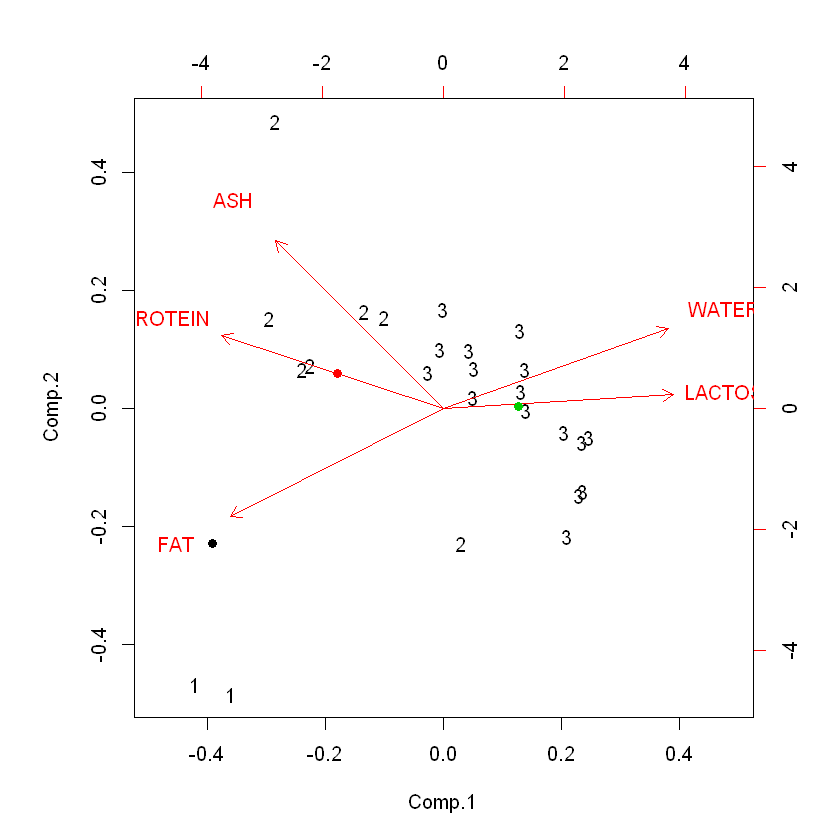

In [5]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 3 representa a los individuos con mayores valores de FAT, mientras corresponde a los mamíferos con mayores porcentajes de agua y lactosa y por otra parte el grupo 2 contiene mamíferos con mayores porcentajes de proteína y calcio (a excepción de un caso).

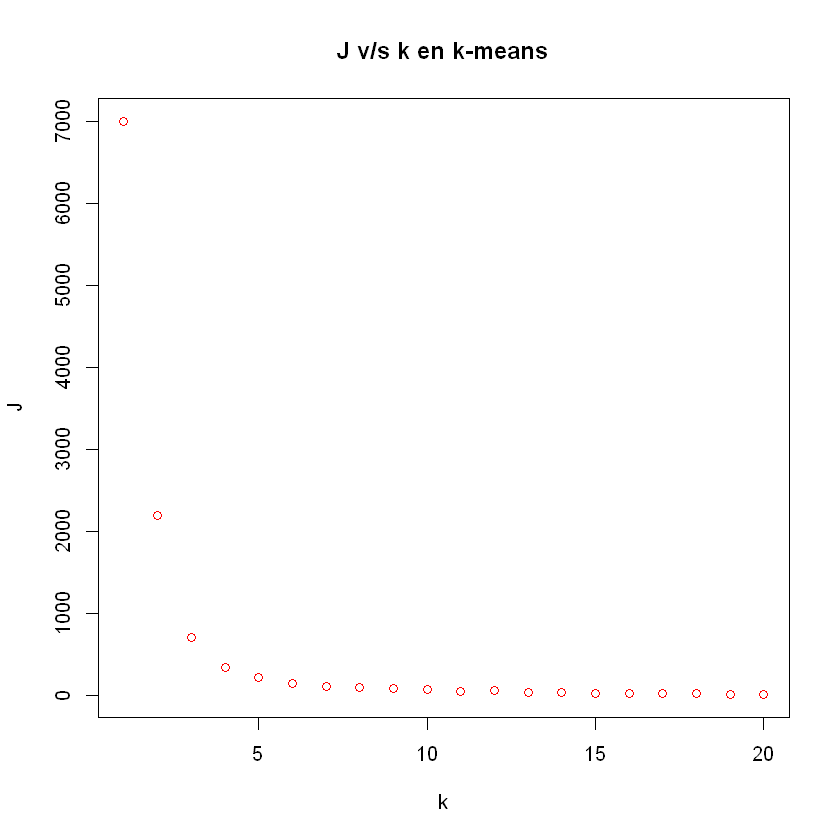

In [6]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Ejercicio 1:** 
1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Agregue código para automatizar este criterio.
2. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados

#### Respuesta 1.1:
De acuerdo a la heurística vista en clases, el codo en el gráfico se encuentra entre k =3 o 4. Por parsimonia se escoje k=3. El código para automatizar la heurística es el siguiente:

In [7]:
J<-rep(0,20)
fin_iter<-20
tasa <- rep(0,20)
dif <- rep(1,20)
cl_1 <- kmeans(datos,1,iter.max=1000,nstart=10)
J[1] <-cl_1$tot.withinss
cl_2 <- kmeans(datos,2,iter.max=1000,nstart=10)
J[2] <-cl_2$tot.withinss
dif[2] <- J[1]-J[2]
tasa[2]<-1
t_max <- 1
k_max <-1

for (k in 3:fin_iter){
     cl<-kmeans(datos,k,iter.max=2000,nstart=10)
	 J[k]<-cl$tot.withinss
     dif[k] <- J[k-1]-J[k]
    # calcula la tasa mientras la función de pérdida sea decreciente
     if ((dif[k] >0)&&(tasa[k-1]>0)){
         tasa[k] <- dif[k-1]/dif[k]
         if (tasa[k]>t_max) {
             t_max <- tasa[k]
             k_max <- k-1
         }
     }
     print(c(J[k],dif[k], dif[k-1], tasa[k]))
}

print(k_max)

[1]  704.403726 1482.419188 4818.266230    3.250272
[1]  341.885448  362.518278 1482.419188    4.089226
[1] 212.504458 129.380989 362.518278   2.801944
[1] 141.106117  71.398342 129.380989   1.812101
[1] 109.515408  31.590708  71.398342   2.260106
[1] 87.337075 22.178333 31.590708  1.424395
[1] 76.352662 10.984413 22.178333  2.019073
[1] 66.167795 10.184867 10.984413  1.078503
[1] 59.382928  6.784867 10.184867  1.501115
[1] 36.9515950 22.4313333  6.7848667  0.3024727
[1]  52.52625 -15.57466  22.43133   0.00000
[1]  22.31998  30.20627 -15.57466   0.00000
[1] 20.55403  1.76595 30.20627  0.00000
[1] 21.1729167 -0.6188833  1.7659500  0.0000000
[1] 17.1725500  4.0003667 -0.6188833  0.0000000
[1] 7.229983 9.942567 4.000367 0.000000
[1] 11.404983 -4.175000  9.942567  0.000000
[1]  4.369983  7.035000 -4.175000  0.000000
[1] 3


In [18]:
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
x1 <- tapply(datos[,1],cl$cluster,median)
x2<- tapply(datos[,2],cl$cluster,median)
x3 <- tapply(datos[,3],cl$cluster,median)
x4 <- tapply(datos[,4],cl$cluster,median)
x5 <- tapply(datos[,5],cl$cluster,median)
medianas <- cbind(x1,x2,x3,x4,x5)
colnames(medianas)<- c('Agua','Proteina','Grasa','Lactosa','Calcio')
print(medianas)

   Agua Proteina Grasa Lactosa Calcio
1 45.65    10.15 38.45    0.45   0.69
2 70.70    10.40 17.60    2.60   1.40
3 86.70     3.70  4.00    5.10   0.73


#### Respuesta 1.2:
Al considerar 3 grupos con el algoritmo KMeans, se obtienen los siguientes valores de medianas por grupo:
Grupo 1: 2 mamíferos (focas y delfines) cuya leche tiene los menores porcentajes de agua, lactosa y calcio y mayores porcentajes de grasa.
Grupo 2: 6 mamíferos cuya leche tiene  porcentaje medio de agua, grasa y lactosa y mayores porcentajes de proteína y calcio.
Grupo 3: 17 mamíferos, cuya leche tiene los mayores porcentajes de agua y lactosa y los menores porcentajes de proteína, grasa y calcio.

**Ejercicio 2:** Realice un análisis de clustering con un subconjunto de datos de comunas.csv. 
1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [3]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".")
head(datos)

,Regi.n,Comuna,Poblaci.n..miles..2011,IDSE,Ingreso.per.c.p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Iquique,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
2,1,Pica,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
3,1,Pozo Almonte,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
4,1,Alto Hospicio,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
5,1,Huara,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
6,2,Calama,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


Para reducir la complejidad del análisis se analizarán sólo 4 regiones: metropolitana, Araucanía, Los Ríos y Los Lagos.

[1] 323  14

[1] 124  12

       V1               V2               V3               V4       
 Min.   :  4.00   Min.   :0.2650   Min.   :  93.2   Min.   : 1.30  
 1st Qu.: 13.25   1st Qu.:0.4667   1st Qu.: 136.5   1st Qu.:10.07  
 Median : 31.55   Median :0.5580   Median : 160.8   Median :13.80  
 Mean   : 72.05   Mean   :0.5577   Mean   : 198.0   Mean   :16.29  
 3rd Qu.: 91.25   3rd Qu.:0.6480   3rd Qu.: 199.0   3rd Qu.:21.23  
 Max.   :735.40   Max.   :0.9920   Max.   :1143.1   Max.   :39.50  
       V5               V6              V7               V8       
 Min.   : 6.400   Min.   :56.70   Min.   : 23.60   Min.   :71.40  
 1st Qu.: 8.175   1st Qu.:78.47   1st Qu.: 66.25   1st Qu.:75.10  
 Median : 9.000   Median :84.20   Median : 84.50   Median :76.25  
 Mean   : 9.278   Mean   :82.70   Mean   : 78.93   Mean   :76.28  
 3rd Qu.:10.025   3rd Qu.:88.28   3rd Qu.: 95.40   3rd Qu.:77.30  
 Max.   :15.000   Max.   :98.00   Max.   :100.00   Max.   :82.20  
       V9              V10              V11            

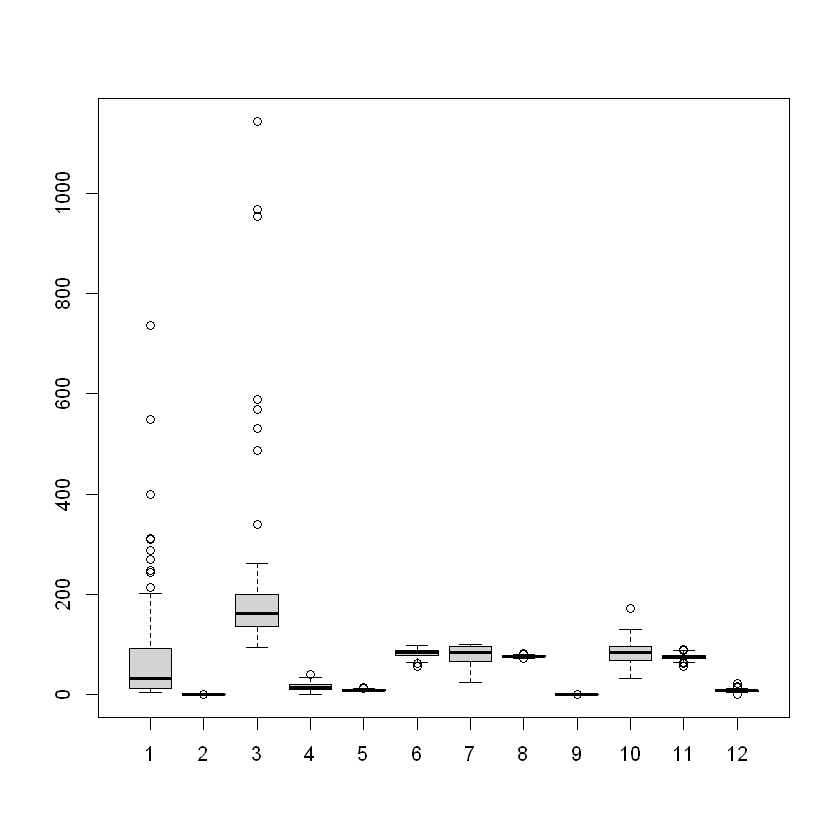

In [42]:
dim(datos)
datos13 <- as.matrix(datos[datos[,1]==13,3:14])
datos10 <- as.matrix(datos[datos[,1]==10,3:14])
datos9 <- as.matrix(datos[datos[,1]==9,3:14])
datos14 <- as.matrix(datos[datos[,1]==14,3:14])
datos1 <- rbind(datos13,datos10,datos9,datos14)
datos2 <- matrix(as.numeric(datos1),ncol=12,byrow=FALSE)
dim(datos2)
summary(datos2)
boxplot(datos2)

 [1] "Poblaci.n..miles..2011"                     
 [2] "IDSE"                                       
 [3] "Ingreso.per.c.p..Mens..miles....2006.11"    
 [4] "Pobreza...2006.11"                          
 [5] "Escolaridad..aØos..2006.11"                 
 [6] "Material.Vivienda.bueno.o.acceptable...2006"
 [7] "Alcantarillado.o.Fosa.S.pt....2006"         
 [8] "Esperanza.vida.al.nacer..aØos..2005.10"     
 [9] "X.ndice.Desarrollo.Humano"                  
[10] "Tasa.AVPP.x.1000.h.2007.11"                 
[11] "X..defunc..50..aØos.2011"                   
[12] "Mortalidad.Infantil.x.1000.NV.2009.11"      


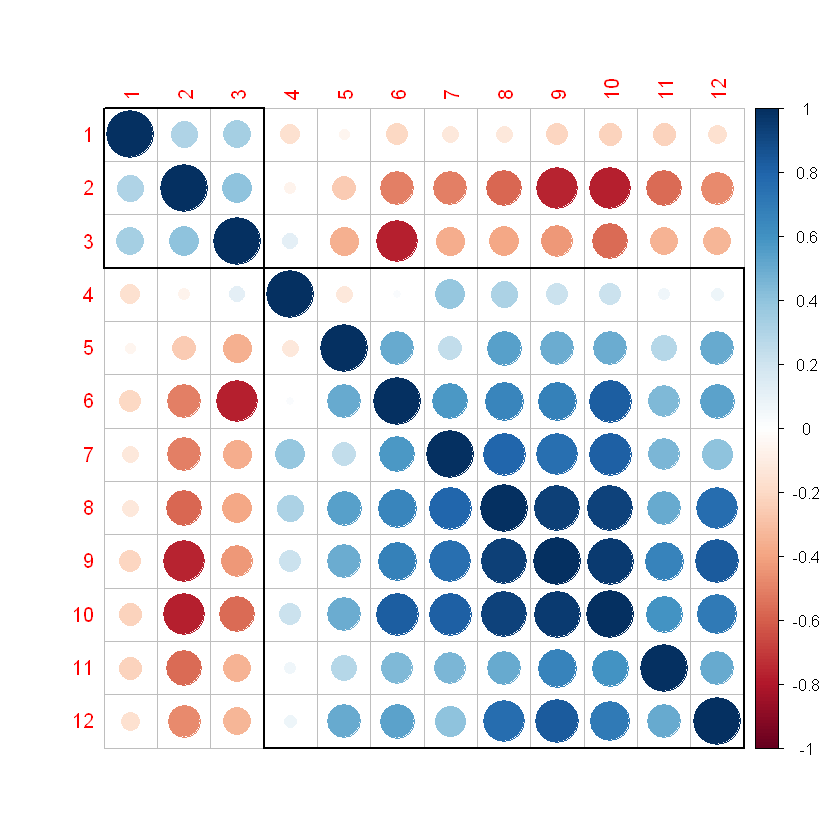

In [43]:
library(corrplot)
print(colnames(datos)[3:14])
correl <- cor(datos2)
corrplot(correl, method = "circle", order = "hclust", addrect = 2)

#### Respuesta Pregunta 2.1:
1) Los datos consideran 12 variables e índices socio-económicos y de salud descritos a nivel de las 323 comunas de Chile. Del análisis PCA realizado en la tarea anterior, se sabe que es un conjunto de datos complejo de analizar, y que presenta algunas variables mas correlacionadas que otras. Del cálculo de la matriz de correlaciones, se observa además que la cantidad de habitantes en cada comuna, su índice IDSE y el ingreso per cápita están relacionadas positivamente entre sí, formando un grupo de variables. Mientras que todas las otras variables forman otro grupo de variables correlacionadas positivamente entre si, y negativamente con el grupo anterior, a excepción de pobreza que parece no estar correlacionada directamente con ninguna de las variables descritas.

La falta de asociación de pobreza con las demás variables no parecen muy lógica, por lo que se estima que podría haber distintos grupos en los datos, que al analizarlos todos juntos provocan estas conclusión poco intuitiva. Ya en el PCA se observó que las relaciones entre variables se modificaban si se estudiaba por separado las comunas con mas de 100.000 habitantes de aquellas con menor población. Esta es una buena razón por la cual generar un análisis de agrupamiento y luego analizar el comportamiento de las variables al interior de cada grupo. 

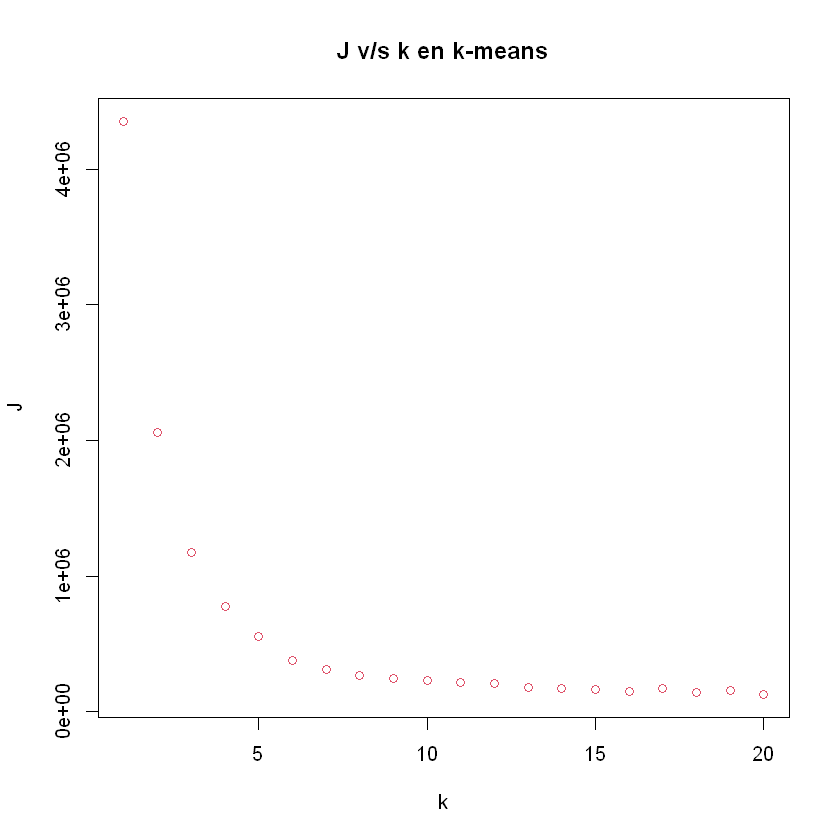

In [44]:
#datos3 <- scale(datos2)
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos2,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [45]:
J<-rep(0,9)
fin_iter<-9
tasa <- rep(0,9)
dif <- rep(1,9)
cl_1 <- kmeans(datos2,1,iter.max=1000,nstart=10)
J[1] <-cl_1$tot.withinss
cl_2 <- kmeans(datos2,2,iter.max=1000,nstart=10)
J[2] <-cl_2$tot.withinss
dif[2] <- J[1]-J[2]
tasa[2]<-1
t_max <- 1
k_max <-1

for (k in 3:fin_iter){
     cl<-kmeans(datos2,k,iter.max=2000,nstart=10)
	 J[k]<-cl$tot.withinss
     dif[k] <- J[k-1]-J[k]
    # calcula la tasa mientras la función de pérdida sea decreciente
     if ((dif[k] >0)&&(tasa[k-1]>0)){
         tasa[k] <- dif[k-1]/dif[k]
         if (tasa[k]>t_max) {
             t_max <- tasa[k]
             k_max <- k-1
         }
     }
     print(c(J[k],dif[k], dif[k-1], tasa[k]))
}

print(k_max)

[1] 1.171833e+06 8.869198e+05 2.296462e+06 2.589256e+00
[1] 9.442791e+05 2.275535e+05 8.869198e+05 3.897631e+00
[1] 5.510752e+05 3.932039e+05 2.275535e+05 5.787164e-01
[1] 3.772258e+05 1.738493e+05 3.932039e+05 2.261751e+00
[1] 299370.52402  77855.30544 173849.33815      2.23298
[1] 2.626254e+05 3.674509e+04 7.785531e+04 2.118795e+00
[1] 2.293505e+05 3.327499e+04 3.674509e+04 1.104286e+00
[1] 3


#### Respuesta Pregunta 2.2 
De la gráfica se observa un primer codo en k=3, lo cual se verifica con el código automatizado.

In [48]:
cl<-kmeans(datos2,3,iter.max=1000,nstart=10)
mediana <- matrix(0, ncol=12, nrow=3)
for (i in 1:12) 
    mediana[,i] <- tapply(datos2[,i],cl$cluster,median)
#rownames(mediana)<- c('G1','G2','G3','G4','G5','G6')
rownames(mediana)<- c('G1','G2','G3')
mediana <- round(mediana, digits=2)
print(t(mediana))

          G1     G2     G3
 [1,] 126.60  23.75 309.10
 [2,]   0.89   0.54   0.67
 [3,] 587.90 155.95 214.20
 [4,]   4.10  15.75  11.50
 [5,]  13.70   8.65  10.80
 [6,]  95.70  83.05  88.20
 [7,] 100.00  79.25  98.00
 [8,]  80.00  75.90  78.20
 [9,]   0.84   0.48   0.62
[10,]  53.20  86.60  58.80
[11,]  87.40  76.45  72.70
[12,]   6.30   7.70   7.30



  1   2   3 
  7 108   9 

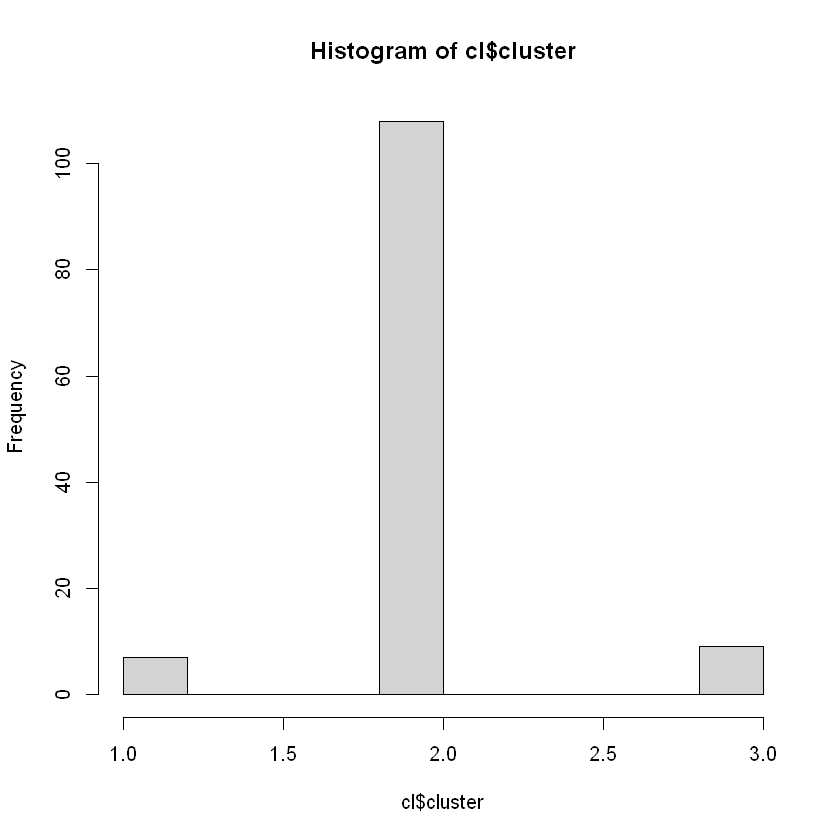

In [49]:
hist(cl$cluster)
table(cl$cluster)

Call:
princomp(x = datos2, cor = TRUE)

Standard deviations:
     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
2.535746219 1.183768234 1.072373422 0.922263253 0.860389709 0.687205660 
     Comp.7      Comp.8      Comp.9     Comp.10     Comp.11     Comp.12 
0.648663335 0.564629464 0.395257848 0.239441080 0.049635189 0.003541723 

 12  variables and  124 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
1,6.4873441,-1.81173225,-0.01329144,1.1462011,-0.71265963,0.04257985,0.42839542,-0.76853105,0.08006695,0.031537866,0.012878634,1.593239e-03
2,-0.6493346,-0.05493193,-0.07544572,-0.0930318,-0.04137809,-0.02028828,-0.09369443,0.02828052,-0.02259942,-0.003758737,-0.002431845,6.417192e-05
3,2.7463033,2.06830830,0.91568646,0.2248918,1.05082791,0.21034169,0.79113672,0.25838009,0.20891873,0.020575391,0.019165420,-2.009249e-03


K-means clustering with 3 clusters of sizes 7, 108, 9

Cluster means:
      [,1]      [,2]     [,3]      [,4]      [,5]     [,6]     [,7]     [,8]
1 144.0714 0.8992857 748.2857  4.214286 13.614286 93.50000 99.68571 80.07143
2  43.0500 0.5258796 161.1944 17.381481  8.880556 81.64630 76.10370 75.86204
3 364.0111 0.6741111 211.0000 12.533333 10.677778 86.96667 96.68889 78.37778
       [,9]    [,10]    [,11]    [,12]
1 0.8670000 57.27143 84.78571 6.114286
2 0.4821204 87.14630 75.89444 7.850926
3 0.6267778 59.64444 71.35556 7.500000

Clustering vector:
  [1] 1 1 1 1 1 1 1 2 3 3 2 2 3 2 2 2 2 2 3 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 452033.1 468164.3 251635.2
 (between_SS / total_SS =  73.1 %)

Available components:

[1] "cluster"      "centers"      "totss"

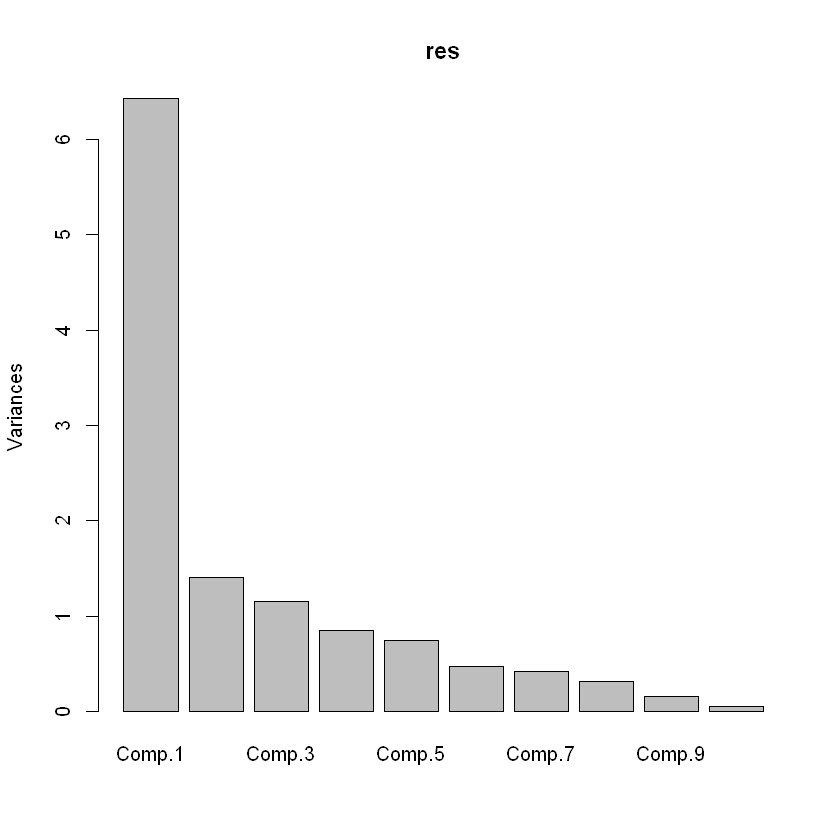

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): objeto 'k0' no encontrado


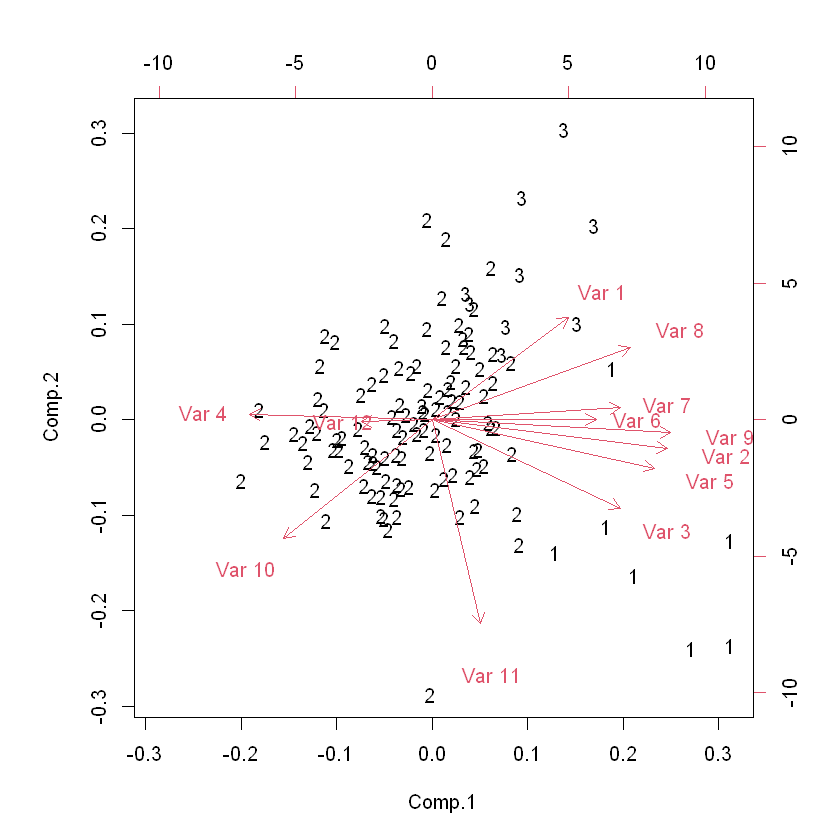

In [50]:
res <- princomp(datos2, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

#### Respuesta Pregunta 2.3
De acuerdo al agrupamiento se distingue claramente un grupo pequeño (G1), de 7 comunas, caracterizado por altos ingresos, altos índices socioeconómicos y de salud, cantidad de habitantes medio, y bajo índice de pobreza, tasa de AVPP y mortalidad infantil. Por otra parte, tenemos un segundo grupo de las 9 comunas con mayor cantidad de habitantes (G3) con valores medios de los índices socio-económicos y de salud, a excepción de mortalidad en menores de 50 años. Este resultado se puede explicar por que en dichas comunas existe mayor acceso a fuentes de trabajo y establecimientos de salud.  Por último tenemos el grupo (G2) que concentra a la mayor cantidad de comunas (108), con bastante menor número de habitantes y los mas bajos índices socio-económicos y de salud, mayores niveles de pobreza y tasa de AVPP y valores medios de mortalidad menores de 50 años.